In [92]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

In [93]:
style.use('ggplot')
df=quandl.get('WIKI/GOOGL')#Fetching out the data

In [94]:
#Calculating the useful Features
df=df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',]]
df['HL_PCT']=(df['Adj. High']-df['Adj. Close'])/df['Adj. Close'] * 100.0
df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] * 100.0
df=df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [95]:
#Same as above
forecast_col='Adj. Close'
df.fillna(-99999,inplace=True)
forecast_out=int(math.ceil(0.01*len(df)))

In [96]:
df['label']=df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.399229
2004-08-20   54.322689  0.710922    7.227007   22834300.0  68.752232
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  69.639972
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  69.078238
2004-08-25   53.164113  1.886792    1.183658    9188600.0  67.839414


In [97]:
#Splitting into features and labels
X=np.array(df.drop(['label'],1))

X=preprocessing.scale(X)
X_lately=X[-forecast_out:]
X=X[:-forecast_out]

df.dropna(inplace=True)
y=np.array(df['label'])
#y=np.array(df['label'])
print(len(X),len(y))

3097 3129


In [101]:
#Training and Testing data split and Model Training 
X_train,_Xtest,y_train,y_test=cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train,y_train)
accuracy = clf.score(X_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [3097, 3129]

In [99]:
#Predicting the price of stock after 32 days
forecast_set=clf.predict(X_lately)
print(forecast_set, forecast_out)

[ 783.55810287  798.91661132  802.69182867  816.80650446  815.30505364
  822.06967182  824.95714273  822.75030258  816.58709319  820.011109
  822.87759098  819.74261939  817.48512574  815.68193982  817.31120616
  812.02331915  810.68289663  799.65571925  814.73325761  815.16262692
  820.66949787  832.1464199   834.55087691  833.5346685   837.45354369
  837.06312325  838.32727057  834.72093968  836.76079959  831.64312204
  835.77519478  851.10381   ] 32


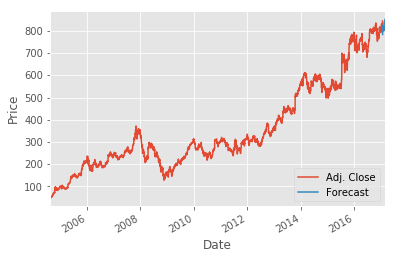

In [100]:
#Graph Plotting
df['Forecast']=np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()